# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

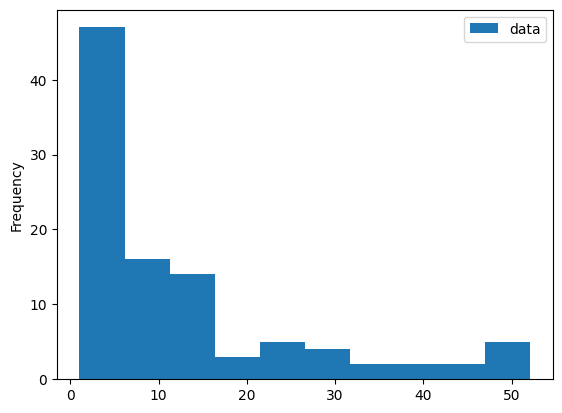

In [20]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

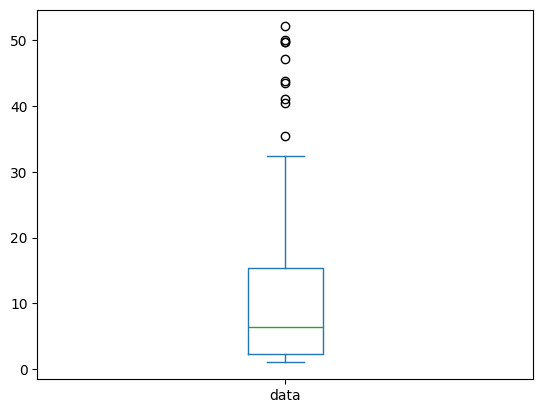

In [21]:
df.plot.box()

### Pros and Cons of Each Visualization

### Histogram

**Pros:**
- Shows the full shape of the distribution, including skewness and clustering.
- Makes it easy to see where most drug prices are concentrated.
- Helps identify whether the distribution is unimodal, bimodal, or heavily skewed.
- Useful for understanding how frequently different price ranges occur.

**Cons:**
- The appearance depends heavily on bin size (too many bins = noisy; too few = oversimplified).
- If the data are strongly right-skewed, the expensive tail may be harder to interpret.
- Does not clearly display quartiles or exact outliers.

---

### Boxplot

**Pros:**
- Clearly shows the median, interquartile range (IQR), and outliers.
- Very effective for highlighting expensive drugs relative to the typical range.
- Compact and easy to interpret.
- Less sensitive to presentation choices compared to histograms.

**Cons:**
- Hides the detailed shape of the distribution.
- Cannot show clusters or multimodal patterns.
- Extreme skewness can compress the box and make variability harder to interpret visually.

---

### Which Visualization Would I Choose?

If the administrator wants to understand how expensive drugs tend to cost in context, I would choose the **boxplot**.

The boxplot directly highlights:
- The median (typical value)
- The middle 50% of prices (IQR)
- The upper quartile
- The outliers (which represent expensive drugs)

Since the question focuses on identifying expensive drugs relative to the rest of the distribution, the boxplot communicates this more clearly and efficiently.

If the goal were instead to understand the overall distribution shape, I would include a histogram as well.

---

### How I Would Improve the Visualization

To improve clarity and storytelling:
- Add a vertical line marking the 75th percentile to help define “expensive.”
- Use a clear takeaway title such as:
  
- Clearly label axes (e.g., "Price in USD").
- Reduce unnecessary gridlines and visual clutter.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [22]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("datasetengineer/logistics-and-supply-chain-dataset")

print(path)

/home/codespace/.cache/kagglehub/datasets/datasetengineer/logistics-and-supply-chain-dataset/versions/1


In [23]:
print(os.listdir(path))
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df.head()

['dynamic_supply_chain_logistics_dataset.csv']


,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  str    
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs               

In [25]:
df.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,5.177648
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,4.157988
min,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,4.536949e-09,...,100.002966,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,-1.999998
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,1.269197
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,6.113662
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,9.249206
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,10.000000


## Indentify numericals vs categoricals

In [26]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numeric Columns:
['vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']

Categorical Columns:
['timestamp', 'risk_classification']


## Histogram for numerical columns

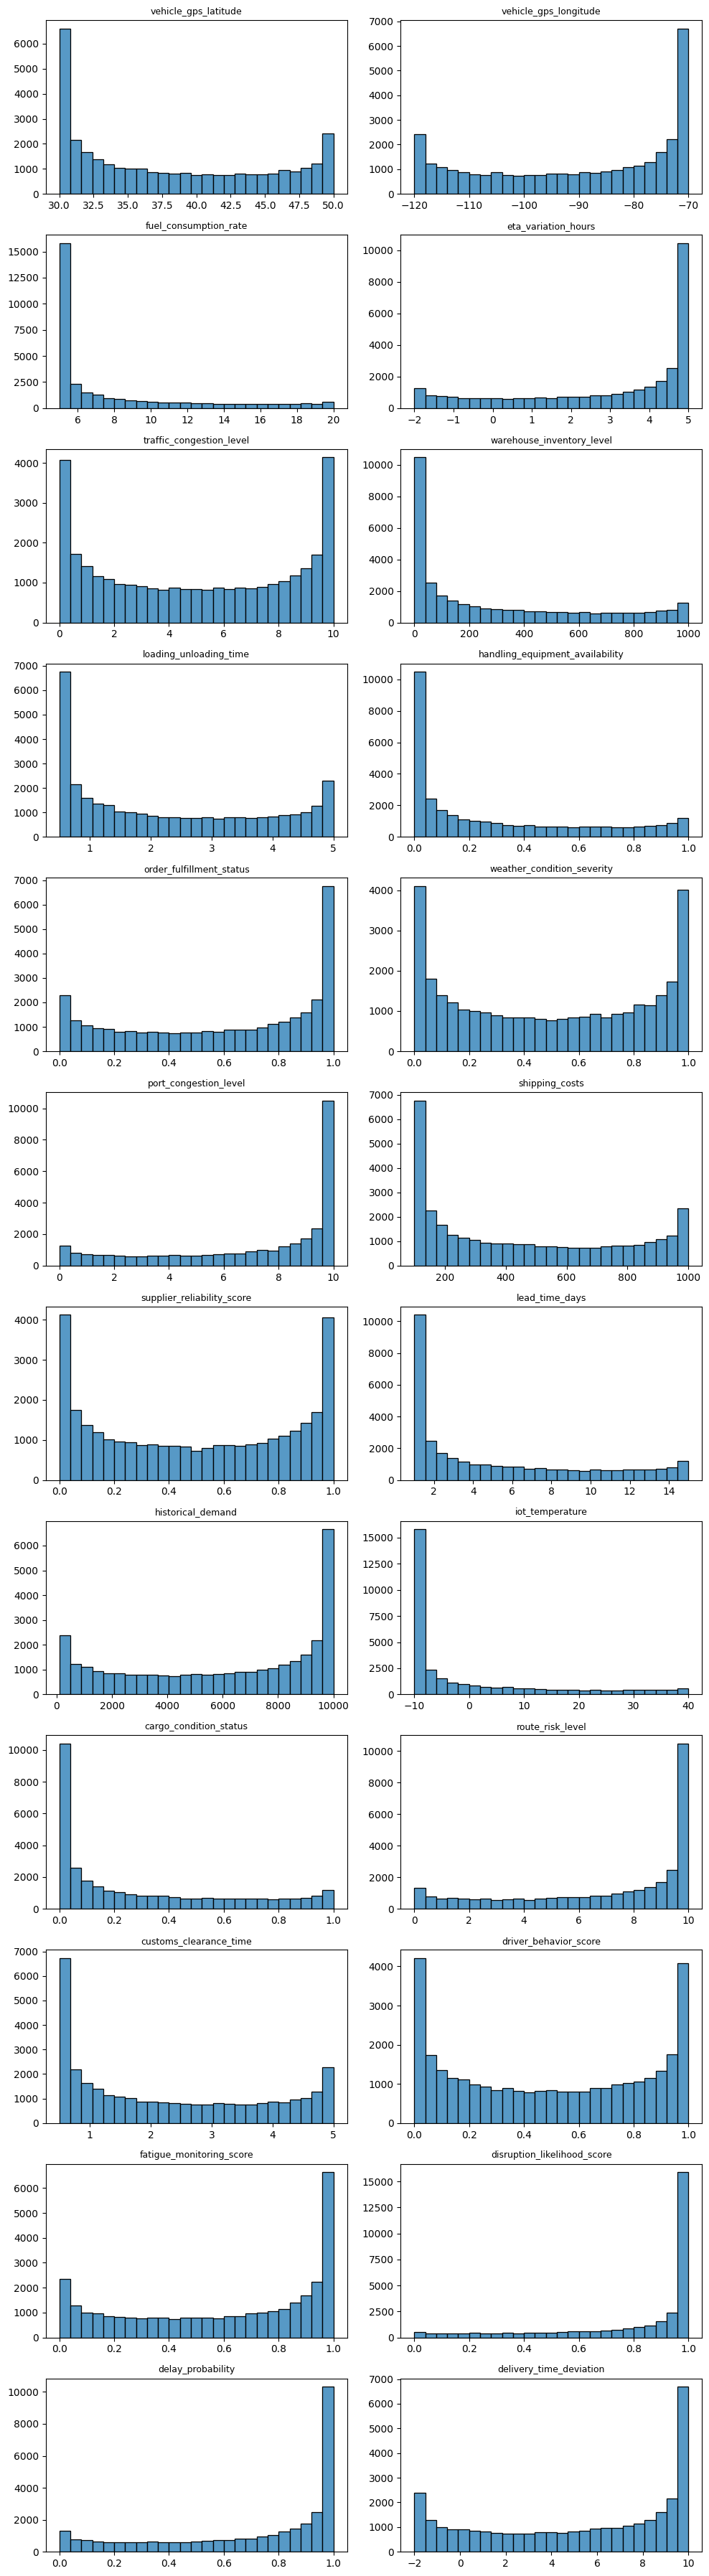

In [27]:
import math

cols = num_cols
n = len(cols)
rows = math.ceil(n / 2)

fig, axes = plt.subplots(rows, 2, figsize=(10, rows * 3))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col].dropna(), bins=25, ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplot if odd number
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

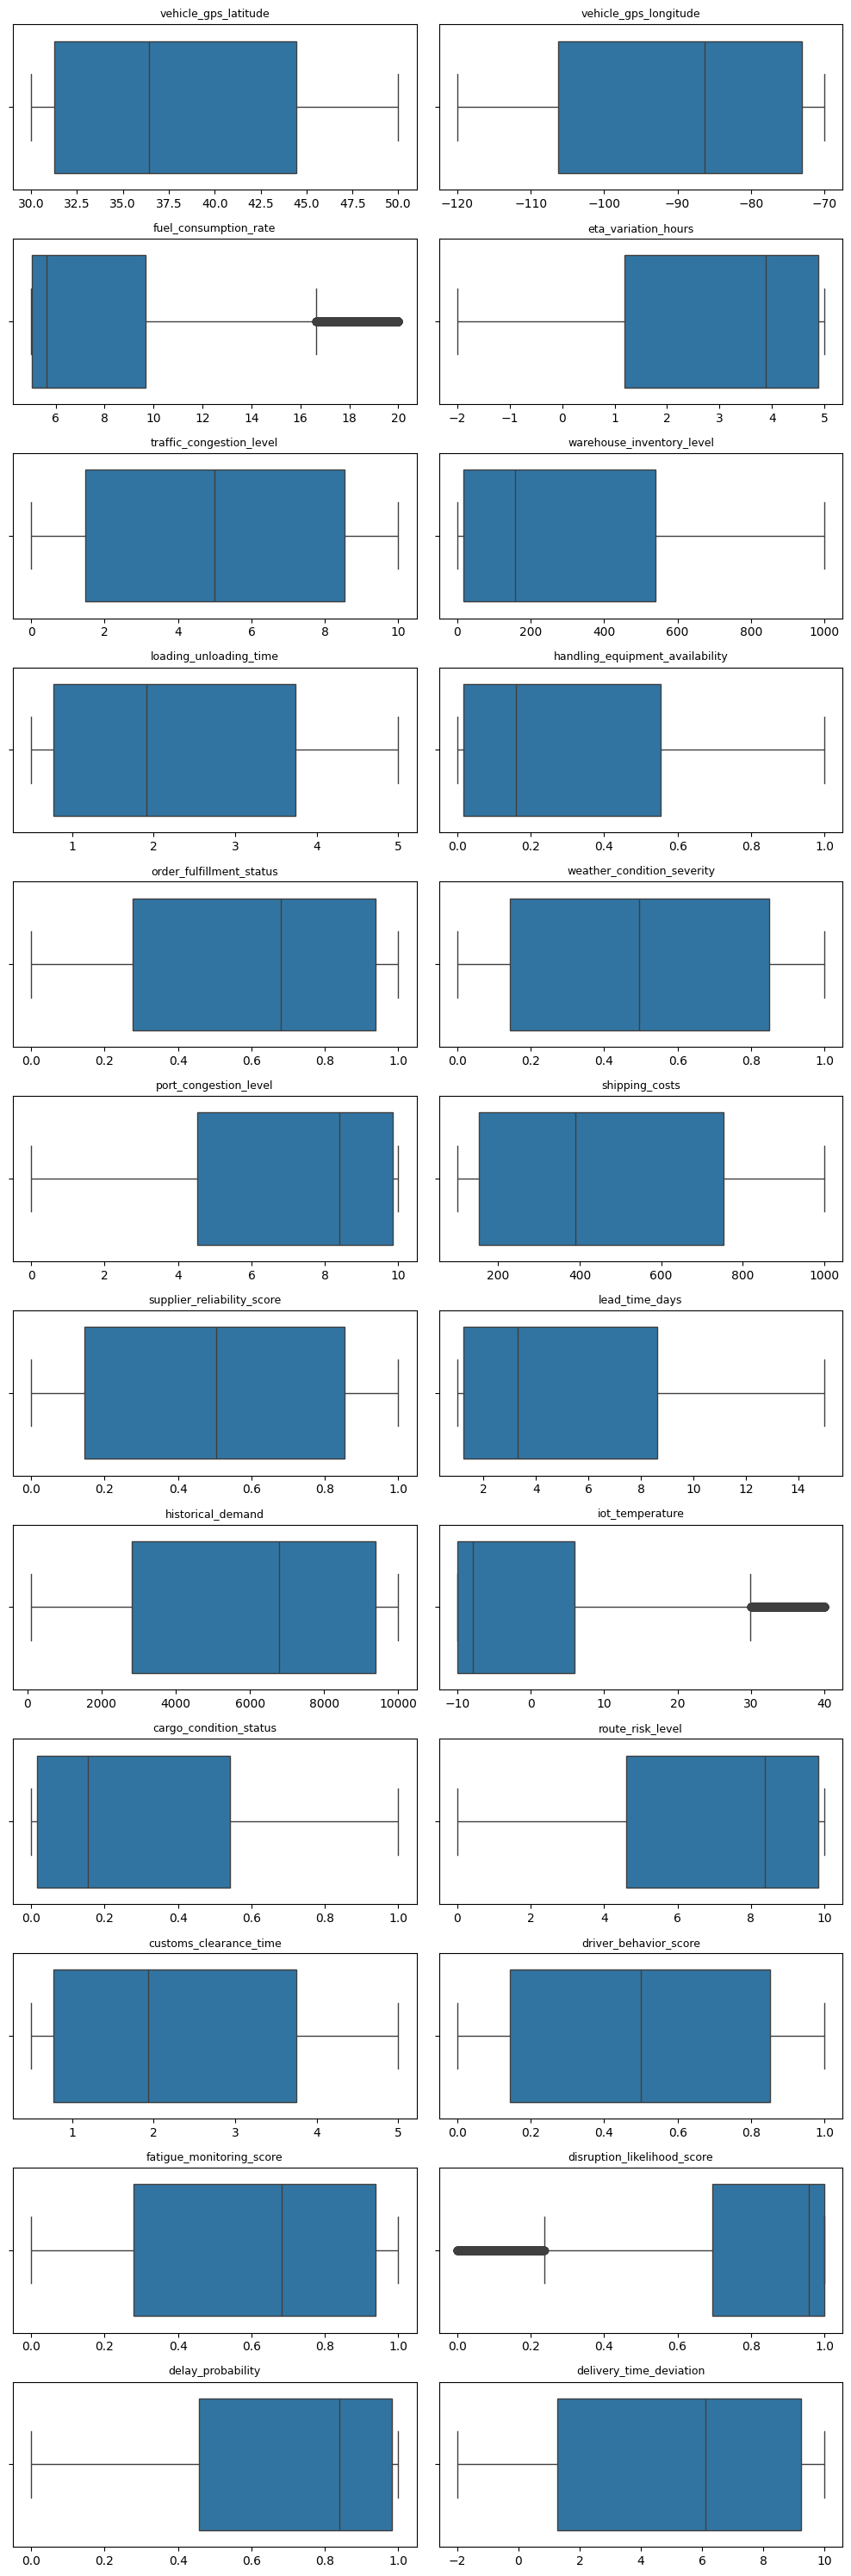

In [28]:
fig, axes = plt.subplots(rows, 2, figsize=(10, rows * 2.5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

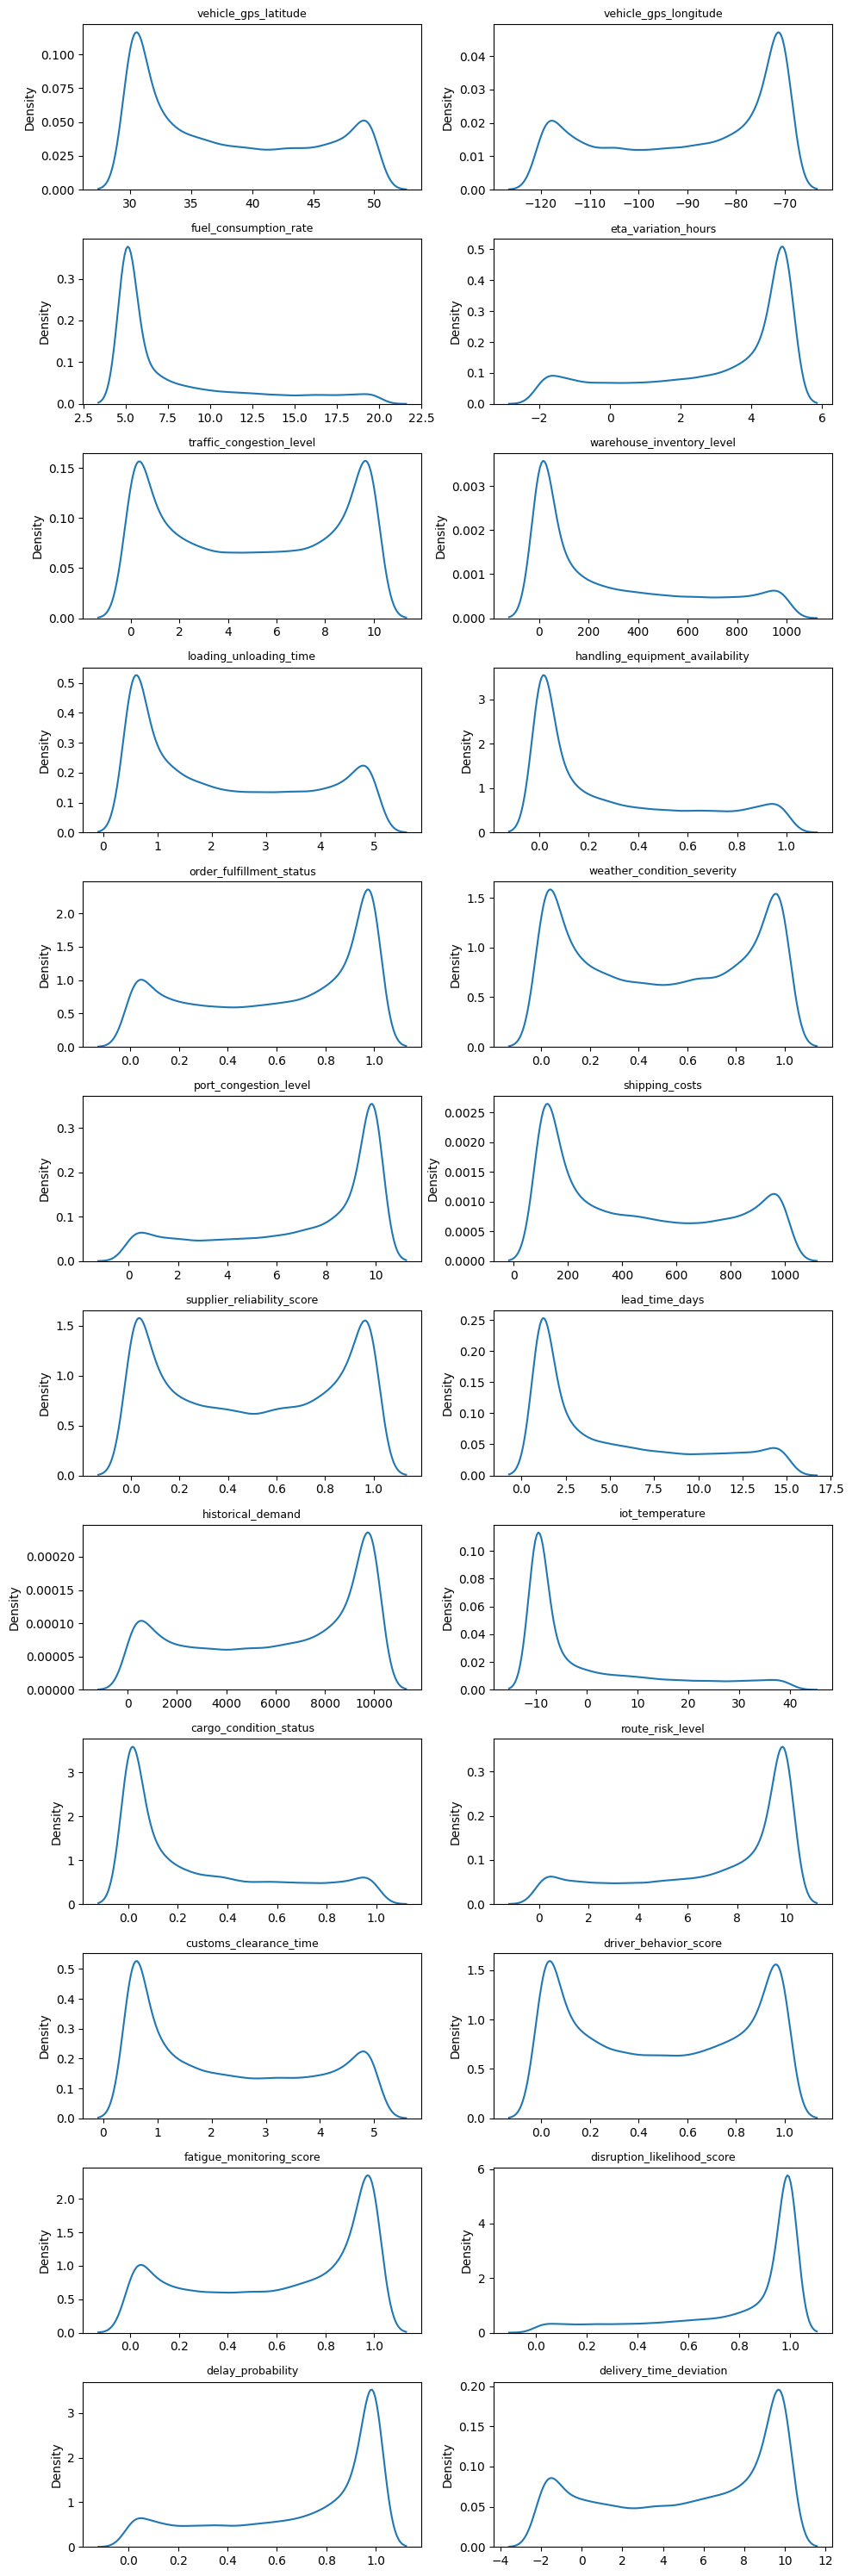

In [29]:
fig, axes = plt.subplots(rows, 2, figsize=(10, rows * 2.5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(df[col].dropna(), ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical Bar Charts

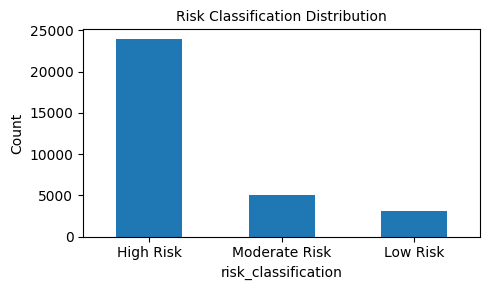

In [30]:
plt.figure(figsize=(5,3))

df["risk_classification"].value_counts().plot(kind="bar")

plt.title("Risk Classification Distribution", fontsize=10)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary Statistics (Mean, Median, Mode, Percentiles)

In [31]:
for col in num_cols:
    s = df[col].dropna()
    print("\n====================")
    print(f"{col}")
    print("Mean:", s.mean())
    print("Median:", s.median())
    print("Mode:", s.mode().iloc[0] if not s.mode().empty else None)
    print("Std:", s.std())
    print("Variance:", s.var())
    print("Min:", s.min())
    print("Max:", s.max())
    print("75th Percentile:", s.quantile(0.75))


vehicle_gps_latitude
Mean: 38.02358900858676
Median: 36.41382018655116
Mode: 30.00000000000937
Std: 6.917908997912243
Variance: 47.857464903395176
Min: 30.00000000000937
Max: 49.99999974528573
75th Percentile: 44.4536551271878

vehicle_gps_longitude
Mean: -90.11664767718246
Median: -86.29341367981668
Mode: -119.99999842346357
Std: 17.369244180318997
Variance: 301.6906433955454
Min: -119.99999842346357
Max: -70.00000000027708
75th Percentile: -73.07936735809113

fuel_consumption_rate
Mean: 8.011734983479823
Median: 5.636035817632568
Mode: 5.0
Std: 4.264960102236597
Variance: 18.189884673670004
Min: 5.0
Max: 19.99987521068584
75th Percentile: 9.66994368595577

eta_variation_hours
Mean: 2.893068010097417
Median: 3.882059226946552
Mode: -1.999993096796247
Std: 2.2740439361901226
Variance: 5.171275823723066
Min: -1.999993096796247
Max: 4.999999999999999
75th Percentile: 4.884355037824268

traffic_congestion_level
Mean: 4.9914932089194375
Median: 4.981244166033586
Mode: 1.0916326575415083e-

## GROUPED HISTOGRAM 

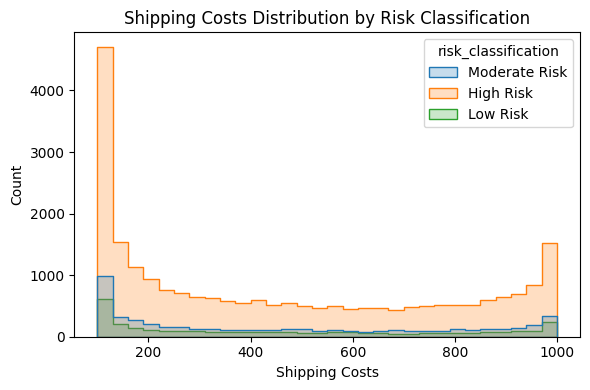

In [32]:
numeric_var = "shipping_costs"
category_var = "risk_classification"

plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x=numeric_var,
    hue=category_var,
    element="step",
    common_norm=False,
    bins=30
)
plt.title("Shipping Costs Distribution by Risk Classification")
plt.xlabel("Shipping Costs")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Conclusion



### Are the data what you expect? Are they usable?

The dataset contains 32,065 observations with no missing values, so it appears complete and usable. The variables represent realistic supply chain metrics such as shipping costs, delay probability, congestion levels, and lead time. The data look structured and consistent, so they are suitable for further analysis.

---

### What is the overall shape of the distributions?

Most of the numeric variables are **right-skewed**, meaning there are many smaller values and fewer large values.

For example:
- `shipping_costs` has a mean (459) higher than the median (389), which indicates right skew.
- `warehouse_inventory_level` and `historical_demand` also show long right tails.

Some variables that are bounded between 0 and 1 (like `delay_probability` and `supplier_reliability_score`) do not follow a normal distribution because they are limited to a specific range.

Overall, the distributions are mostly skewed rather than normal.

---

### Are there any outliers?

Yes, there are outliers in several variables.

- `shipping_costs` reaches values close to 1000, which are much higher than the median.
- `delivery_time_deviation` reaches up to 10 hours, while many observations are much lower.
- `historical_demand` also has some very large values compared to the rest.

These outliers likely represent real extreme situations in logistics rather than errors.

---

### How does the distribution change across groups?

When grouping `shipping_costs` by `risk_classification`:

- High Risk shipments have a wider spread of costs.
- Low Risk shipments are more concentrated in lower cost ranges.

There is also class imbalance:
- High Risk: 23,944 observations
- Moderate Risk: 5,011
- Low Risk: 3,110

This shows that most shipments are labeled High Risk.

---

### What are the minimum and maximum values?

Some examples:

- `shipping_costs`: 100 to 1000
- `lead_time_days`: 1 to 15
- `delivery_time_deviation`: -2 to 10
- Probability variables: 0 to 1

These ranges make sense for supply chain performance metrics.

---

### How do bin sizes affect the histogram?

Changing the number of bins changes how the distribution looks.

- Fewer bins make the distribution look smoother.
- More bins reveal more detail and show skewness more clearly.

For variables like shipping costs, smaller bins make the long tail more visible.

---

### Does the distribution appear normal?

Most variables do **not** appear normally distributed. Many are skewed or bounded within certain ranges. This is expected for operational and cost-related supply chain data.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

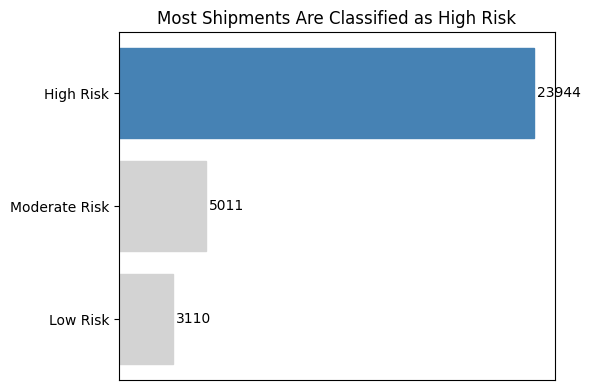

In [33]:
# Get risk counts
risk_counts = df["risk_classification"].value_counts().sort_values()

plt.figure(figsize=(6,4))

bars = plt.barh(risk_counts.index, risk_counts.values)

# Make everything gray
for bar in bars:
    bar.set_color("lightgray")

# Highlight the largest category
bars[-1].set_color("steelblue")

# Remove unnecessary clutter
plt.xticks([])
plt.ylabel("")
plt.title("Most Shipments Are Classified as High Risk", fontsize=12)

# Direct labeling
for i, v in enumerate(risk_counts.values):
    plt.text(v + 200, i, str(v), va='center')

plt.tight_layout()
plt.show()